<h1> Bias in Facial Recognition Models </h1>

This notebook was written by Lauren Klein and Mack Hutsell based on a 2018 paper by Joy Buolamwini and Timnit Gebru titled [Gender Shades: Intersectional Accuracy Disparities in Commercial Gender Classification](http://proceedings.mlr.press/v81/buolamwini18a/buolamwini18a.pdf).

<h3> Table of Contents </h3>

1. [Learning Goals](#Learning_goals)
2. [Background](#Background)
    1. [Facial Recognition Systems Introduction](#fr_systems)
    2. [Machine Learning Overview](#ml_overview)
    3. [Representing Images in Computers](#repr_images)
        1. [Representing Color Images in Computers](#color_images)
3. [Analysis](#Analysis)
    1. [Datasets](#datasets)
        1. [Examining a Dataset](#examine_dataset)
    2. [Models](#models)
    3. [Experiments](#experiments)
        1. [Experiment 1 - Overall Accuracy](#experiment_1)
            1. [Confusion Matrices in relation to Accuracy, Precision, Recall, and False Positivity Rate](#apr)
        2. [Experiment 2 - Precision and Recall Assessed by Gender](#experiment_2)
        3. [Experiment 3 - All Data Accuracy, Precision, and Recall](#experiment_3)
4. [Evaluation](#Evaluation)
5. [Conclusion](#Conclusion)
6. [Sources](#Sources)

<h2> Learning Goals <a name="Learning_goals"></a></h2>

1. Gain an intuition for the domain of machine learning, specifically facial recognition models
    
    - Why do we need machine learning models? Do we need them?
    
    - How are they trained?
    
    - How are they evaluated?

2. Understand the importance of dataset analysis
    
    - How do biases enter datasets?
    
    - How can bias affect machine learning models?

<h2> Background <a name="Background"></a></h2>

<h3> 1. Facial Recognition Systems <a name="fr_systems"></a></h3>

Facial recognition systems are not a new technology. In fact, they gained popularity (in the U.S.) almost thirty years ago after the U.S. military created a facial recognition technology program (FERET). Outside of the military, facial recognition saw its first uses in DMV offices trying to stop people from obtaining multiple id's under different names. However, local and government law enforcement agencies quickly realized the potential of its applications.

Today, nearly every state's police department uses facial recognition systems, and in [some cases](https://www.documentcloud.org/documents/6587265-Shoesshoplifting-Redacted.html), it is the only evidence used to arrest suspects. With these systems being used to authorize arrests, it's vitally important that they aren't biased. They wouldn't be used otherwise, right?

We're going to take an in-depth look into how and why facial recognition models can often be biased.

<h3> 2. Machine Learning Overview <a name="ml_overview"></a></h3>

First: let's get an overview of **machine learning**.

A couple key terms that will be important:

**Labeled data** - This is data from a dataset in which all of the components have been given some metadata label (a value that answers some question). One example would be a dataset of photos where each photo has either the label "outside" or "inside" (perhaps, in reference to whether the photo was taken inside or outside).

**Unlabeled data** - This is data from a dataset where the components are presented with no metadata labels.

**Machine Learning** (ML) - An iterative (multi-step) algorithm that learns patterns from data.

**Supervised Machine Learning** - Learning patterns by training with a labeled data set. Imagine, for example, a model that learns to predict whether a photo from our earlier dataset was inside or outside. It is much easier to train a model to do this if our data is labeled! That way we can tell it when it has predicted correctly and when it has failed, and it can make updates accordingly.

**Unsupervised Machine Learning** - Learning patterns by looking at unlabeled data.

From looking at these main components, **why** might bias be such an issue in the world of machine learning?

<h3> 3. Back to Facial Recognition / Representing Images in Computers <a name="repr_images"></a></h3>

You may be wondering: where does facial recognition fit into all of this?

Facial recognition models almost always involve **supervised machine learning**.

This means they require labeled datasets. We'll analyze one of those datasets soon, but first: ***how are images represented in computers?***

Let's take a look

<Figure size 432x288 with 0 Axes>

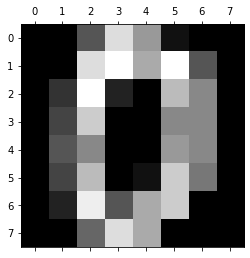

In [1]:
# Package/Module Imports!
# Packages are used to provide extra functionality so that the same algorithms don't have to be coded all the time.
# "import package_name as smth" just allows shorthand reference for the package later on!

import sklearn.datasets         # Sklearn has a lot of statistical and ML functionality, it also has toy datasets
import pandas as pd             # This package is often used for storing, managing, and accessing datasets
import matplotlib.pyplot as plt # This package is used for plotting graphs, images

# Code
digits = sklearn.datasets.load_digits(as_frame='true') # Let's import our data ("as_frame='true'" tells it to return a pandas-friendly object)
plt.gray()                                             # This lets plt know that our images are grayscale.
plt.matshow(digits.images[0])                          # Now, let's plot the first image in our dataset
plt.show()                                             # and show it here!

(The Number 0)

Notice how the pixelation and numbering along the axes align - **how might this be represented in a mathematical format?**

If you guessed <em> a matrix</em>, you're absolutely correct! Let's print out the matrix form of this image:

In [4]:
print(digits.images[0]) # Print out the numerical values that constitute the first image in our dataset.

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


Taking the matrix and the image side by side, **what might each of the numbers correspond to?**

*note: the value range for each element is 0-15*

You may be wondering: **what about color images?**

For the purposes of this notebook, don't worry about it. The most important takeaway is that images are stored as matrices where each value represents the color of a certain pixel.

For those interested, I've left a short description of color images below.

> **Optional**
> <h4> Color Images in Computers <a name="color_images"></a> </h4>
>
> Standard color images in computers are represented in a similar format to grayscale images with a couple key exceptions.
>
> 1. Each pixel's color is represented by 3 different values. (You can imagine this as one matrix where each entry is a set of 3 values, or 3 separate matrices)
>    - One value represents the amount of 'red' in the color, another the amount of 'blue', and the third the amount of 'green'   
>    
> 2. The value range for each of the RGB elements is 0 - 255.
>
> And for fun, here are the equations to make photos sepia-toned: R = Red, G = Green, B = Blue
>
> 𝑁𝑒𝑤 𝑅 = 0.393(𝑂𝑙𝑑 𝑅) + 0.769(𝑂𝑙𝑑 𝐺) + 0.189𝑥(𝑂𝑙𝑑 𝐵)
>
> 𝑁𝑒𝑤 𝐺 = 0.349(𝑂𝑙𝑑 𝑅) + 0.686(𝑂𝑙𝑑 𝐺) + 0.168𝑥(𝑂𝑙𝑑 𝐵)
>
> 𝑁𝑒𝑤 𝐵 = 0.272(𝑂𝑙𝑑 𝑅) + 0.534(𝑂𝑙𝑑 𝐺) + 0.131𝑥(𝑂𝑙𝑑 𝐵)
>
> Equations taken from Lab 0 of Emory University CS 350 w/ Dr. Arnold

<h2> Analysis <a name="Analysis"></a></h2>

<h3> 1. Datasets <a name="datasets"></a></h3>

IJB-A (US Government): https://www.nist.gov/itl/iad/image-group/ijb-dataset-request-form

- This dataset had to additionally have gender and Fitzpatrick skin type labels added

Adience (Eran Eidinger et al.): https://talhassner.github.io/home/projects/Adience/Adience-data.html

- This dataset had to additionally have Fitzpatrick skin type labels added

Pilot Parliaments Benchmark Dataset (Buolamwini and Gebru): https://www.ajl.org/connect/request-dataset-for-research


After augmentation, all datasets had both Fitzpatrick skin type labels and gender labels.

**Fitzpatrick Skin Type:** A six-point classification system that labels skin from lighter (I) to darker (VI). As pointed out in the paper, the classification skews toward representing lighter skin, resulting in relatively coarse categorization for other skin types. Though by no means ideal, it serves as a dermatologist-certified starting point for analysis in this field.

**Gender Labels:** Gender labeling in this paper and its datasets is considered a binary task. As the authors of the paper point out, this doesn't account for the complexities of gender. Unfortunately, in order to test the accuracy of commercial gender classification systems (which assume two genders/sexes) they must adopt identical labeling practices. 

<h4> Examining a Dataset <a name="examine_dataset"></a></h4>

Now that we're more familiar with datasets and images in computers, let's take an in-depth look at the Adience dataset.

This dataset was constructed to test machines' abilities to classify gender based on age. It chose photos to have high variance in "appearance, pose, lighting condition and image quality" (Adience Dataset).

In [2]:
# First things first, let's read in our meta data (labels).
# We specify the delimiter in the function call to let pandas know our file is a tab separated file.
meta_data = pd.read_csv("aligned/fold_frontal_0_data.txt", delimiter="\t")
# Notice that we read from a file named 'fold_frontal_0_data.txt' -> we will only be working with frontal photos

print(meta_data.info()) # Print some basic information about our data

count = 0
bad_vals = set()
for ind, row in meta_data.iterrows(): # let's iterate through our data entries
    if row["gender"] not in ["m", "f"]: # Check if the gender entry isn't "m" or "f"
        count += 1
        bad_vals.add(row["gender"])     # If it isn't "m" or "f" let's store what it is in a set
print(count)
print(bad_vals)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3210 entries, 0 to 3209
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             3210 non-null   object
 1   original_image      3210 non-null   object
 2   face_id             3210 non-null   int64 
 3   age                 3210 non-null   object
 4   gender              3163 non-null   object
 5   x                   3210 non-null   int64 
 6   y                   3210 non-null   int64 
 7   dx                  3210 non-null   int64 
 8   dy                  3210 non-null   int64 
 9   tilt_ang            3210 non-null   int64 
 10  fiducial_yaw_angle  3210 non-null   int64 
 11  fiducial_score      3210 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 301.1+ KB
None
326
{nan, 'u'}


From the above printout, we can see that there are 3,210 entries in the dataset. Great!

But there are only 3,163 entries that have a gender label, which we need. And 326 of the labels are "u", presumably for "unknown". 

This problem often surfaces in labeled datasets. Whether it indicates a lack of consensus on deciding the label, or a simple oversight, the best solution is often to just cut the data that isn't complete.

In [3]:
clean_meta_data = meta_data.dropna(axis = 0, how = "any", subset = ["gender"]) # Get rid of entries without a gender entry
clean_meta_data = clean_meta_data.loc[clean_meta_data["gender"] != 'u'] # Only keep entries where gender is not "u"

print(clean_meta_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2884 entries, 0 to 3206
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             2884 non-null   object
 1   original_image      2884 non-null   object
 2   face_id             2884 non-null   int64 
 3   age                 2884 non-null   object
 4   gender              2884 non-null   object
 5   x                   2884 non-null   int64 
 6   y                   2884 non-null   int64 
 7   dx                  2884 non-null   int64 
 8   dy                  2884 non-null   int64 
 9   tilt_ang            2884 non-null   int64 
 10  fiducial_yaw_angle  2884 non-null   int64 
 11  fiducial_score      2884 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 292.9+ KB
None


Perfect, now all entries have complete information.

The following code might take up to a minute to run, so get it started while you read over what it's doing.

In [4]:
import os.path
bad_count = 0 # let's keep track of images we can't find
images = [] # let's store our read-in images
file_paths = []
for ind, row in clean_meta_data.iterrows():
    file_path = "aligned/{}/landmark_aligned_face.{}.{}".format(row['user_id'], row['face_id'], row['original_image'])
    if not os.path.exists(file_path): # Let's make sure our file exists!
        bad_count += 1
        continue
    image = plt.imread(file_path) # Read in our jpg image
    images.append(image)          # Add this image to our list of images
    file_paths.append(file_path)
data = clean_meta_data.assign(image = images, file_path = file_paths) # Now we're making a new dataframe that also has our images and filepaths
print("{} files were not found".format(bad_count)) 
print(data.info()) # Let's see how it looks now

0 files were not found
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2884 entries, 0 to 3206
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             2884 non-null   object
 1   original_image      2884 non-null   object
 2   face_id             2884 non-null   int64 
 3   age                 2884 non-null   object
 4   gender              2884 non-null   object
 5   x                   2884 non-null   int64 
 6   y                   2884 non-null   int64 
 7   dx                  2884 non-null   int64 
 8   dy                  2884 non-null   int64 
 9   tilt_ang            2884 non-null   int64 
 10  fiducial_yaw_angle  2884 non-null   int64 
 11  fiducial_score      2884 non-null   int64 
 12  image               2884 non-null   object
 13  file_path           2884 non-null   object
dtypes: int64(8), object(6)
memory usage: 338.0+ KB
None


Now let's look at an example image and it's corresponding matrix

(816, 816, 3)
[[[ 85  62  70]
  [ 81  58  66]
  [ 82  56  65]
  ...
  [217 184 169]
  [217 184 169]
  [220 187 172]]

 [[ 80  57  63]
  [ 80  57  63]
  [ 82  57  63]
  ...
  [215 182 167]
  [213 180 165]
  [214 181 166]]

 [[ 78  55  61]
  [ 80  57  63]
  [ 82  59  65]
  ...
  [215 182 167]
  [214 181 166]
  [213 180 165]]

 ...

 [[ 57  43  42]
  [ 54  40  40]
  [ 53  39  39]
  ...
  [162 161 133]
  [160 159 131]
  [159 158 130]]

 [[ 56  42  42]
  [ 54  40  40]
  [ 54  40  40]
  ...
  [163 162 134]
  [162 161 133]
  [161 160 132]]

 [[ 53  39  39]
  [ 53  39  39]
  [ 54  40  40]
  ...
  [161 160 132]
  [161 160 132]
  [162 161 133]]]


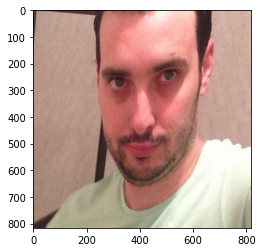

In [8]:
print(data['image'][0].shape) # Dimensions of our matrix
print(data['image'][0]) # Matrix
plt.imshow(data['image'][0]) # Show image

This all looks familiar. Now let's measure some characteristics of our dataset.

**Gender Ratio**

In [9]:
print("{} images are labeled as female".format(data[data.gender == 'f'].shape[0]))
print("{} images are labeled as male".format(data[data.gender == 'm'].shape[0]))

1410 images are labeled as female
1474 images are labeled as male


Relatively balanced for gender, great!

**Image Size Variance**

In [50]:
c = 0
s = set()
for ind, row in data.iterrows():
    s.add(row['image'].shape)
print(s)

{(816, 816, 3)}


Looks like all of our images are a uniform size.

<h3> 2. Models <a name="models"></a></h3>

IBM: https://www.ibm.com/products/maximo/remote-monitoring

- IBM's facial recognition has since been discontinued.

Microsoft: https://azure.microsoft.com/en-us/services/cognitive-services/face/

Face++: https://www.faceplusplus.com/

Since Microsoft and Face++ both charge for their commercial systems, we'll be recreating the paper's process using a freely available gender classifier called DeepFace, which wraps several state of the art facial attribute analysis models (including one from Google and one from FaceBook). 

For an example of how it looks in code, let's try it out on our example image:

In [16]:
from deepface import DeepFace
obj = DeepFace.analyze(img_path = data['file_path'][0], actions = ['gender'])
print(obj["gender"])

Man


<h3> 3. Experiments <a name="experiments"></a></h3>

<h4> Experiment 1 - Overall Gender Classification<a name="experiment_1"></a></h4>

For our first experiment, let's examine how closely our overall gender classification results align with the model's claim of "97.44% accuracy, 96.29% precision and 95.05% recall". We'll talk about what accuracy, precision, and recall represent at the end of this experiment, so don't worry about those definitions for now.

Since we have a list of "true" gender labels, all we have to do is generate gender predictions for all photos and then compare the two lists of labels.

The model predictions take some time, so we'll be working with just 25 images for now, but we will later use pre-computed predictions to complete our analysis.

**This may take up to a minute **

In [17]:
predictions_1 = []
count = 0
num = 25 # number of images to test on
for ind, row in data.iterrows():
    count += 1
    obj = DeepFace.analyze(img_path=row['file_path'], actions=['gender'], enforce_detection=False)
    if obj["gender"] == "Man":
        predictions_1.append("m")
    elif obj["gender"] == "Woman":
        predictions_1.append("f")
    else:
        print("Unexpected prediction {}".format(obj["gender"])) # Just in case!
        predictions_1.append("NaN")
    if count == num:
        break

In [18]:
import sklearn.metrics
# Un-comment these next two lines if you'd like to see what our model or the dataset labels are
# print(predictions) # Our predictions
# print(data['gender'][0:num]) # The dataset's labels
correct_count = 0
for ind in range(num):
    if predictions_1[ind] == data['gender'][ind]: # Did this prediction match up?
        correct_count += 1
print("Accuracy is {}%".format(round(100 * (correct_count / num), 2)))

Accuracy is 84.0%


84.0% accuracy. Not bad. It's not quite what the model advertises, but this is a challenging dataset, so it is expected that it would perform worse.

Let's see if that performance holds for classification of men and women individually.

<h4> Experiment 2 - Gender Classification Performance Broken Down by Gender<a name="experiment_2"></a></h4>

For a more detailed analysis, we can now examine what is known as a ***Confusion Matrix***, a matrix representation of where the model succeeded/failed for both labels.

In [19]:
conf_mat = sklearn.metrics.confusion_matrix(data['gender'][0:num], predictions_1, labels = ["f", "m"]) # pass in the dataset labels and our predicted labels
print(conf_mat) # Print our confusion matrix

[[ 2  4]
 [ 0 19]]


But what do these numbers mean?

Before we analyze this confusion matrix, we have to take a look at its components and understand what they tell us.

> <h4> Confusion Matrices and their connection to Accuracy, Precision, Recall, and False Positivity Rate <a name="apr"></a></h4>
>
> **A Confusion Matrix's Components:**
>
> ***True Positive*** (TP) - Guessed it was x and it was x
>
> ***True Negative*** (TN) - Guessed it was y and it was y
>
> ***False Positive*** (FP) - Guessed it was x but it was actually y
>
> ***False Negative*** (FN) - Guessed it was y but it was actually x
>
> The four values in the confusion matrix represent these four categories. It's important to note that "x" and "y" can take on many different types of values. For example "f" and "m" in our situation, or "positive" and "negative" when testing for the presence of a disease.
>
> In our above confusion matrix, TP is top-left, TN is bottom-right, FP is bottom-left, FN is top-right.
>
>| Confusion Matrix | Pred F     | Pred M     |
>| :------------- | :---------- | ----------- |
>|  True F | TP = 2 | FN = 4 |
>| True M | FP = 0 | TN = 19 |
>
> So our model correctly predicted that 2 women were women, incorrectly labeled 4 women as men, and correctly predicted 19 men as men. (according to dataset labels)
>
> **But how do these translate to accuracy, precision, recall, and false positivity rate?**
>
> Accuracy = (TP + TN) / (TP + FP + FN + TN) (How often is my model correct?)
>
> Precision = TP / (TP + FP) (If my model guesses 'positive', how often is the answer actually 'positive'?) Also known as PPV, Positive Predictive Value
>
> Recall = TP / (TP + FN) (Out of all of the 'positive' labeled examples, how often does my model guess 'positive'?) Also known as TPR, True Positive Rate
>
> False Positve Rate = FN / (TP + FN) (Out of all true 'positive' labeled examples, how many does the model get correct.) This metric is especially important for our analysis.
>
> Note that precision, recall, and FPR in their current formulations only tell you about the 'positive' label.

With these definitions, we can calculate accuracy, precision, and recall using the four values from the confusion matrix.

In [23]:
tp, fn, fp, tn = conf_mat.ravel()
print("TN = {}, FP = {}, FN = {}, TP = {}".format(tn,fp,fn,tp))
accuracy = (tp + tn) / (tn + tp + fn + fp)
f_precision = (tp) / (tp + fp)
f_recall = (tp) / (tp + fn)
f_fpr = (fn) / (fn + tp)
# Swapping formulas now
m_fpr = (fp) / (fp + tn)
m_recall = (tn) / (tn + fp)
m_precision = (tn) / (tn + fn)
print("Female Precision: {}%".format(round(100 * f_precision, 2)))
print("Female Recall: {}%".format(round(100 * f_recall, 2)))
print("Female False Positive Rate {}%".format(round(100 * f_fpr,2)))
print("Male Precision: {}%".format(round(100 * m_precision,2)))
print("Male Recall: {}%".format(round(100 * m_recall,2)))
print("Male False Positive Rate {}%".format(round(100 * m_fpr,2)))

TN = 1378, FP = 96, FN = 791, TP = 619
Female Precision: 86.57%
Female Recall: 43.9%
Female False Positive Rate 56.1%
Male Precision: 63.53%
Male Recall: 93.49%
Male False Positive Rate 6.51%


<h4> Experiment 3 - All Data Analysis <a name="experiment_3"></a></h4>
Now that we've done this for a small subset of images, let's run the same analysis on all of the model's predictions, using pre-computed predictions.

In [21]:
import pickle as p
import sklearn.metrics
predictions = p.load(open("predictions.p", "rb"))
num = len(predictions)

# Accuracy Computation

# Confusion Matrix
conf_mat = sklearn.metrics.confusion_matrix(data['gender'][0:num], predictions, labels = ["f", "m"]) # pass in the dataset labels and our predicted labels
print(conf_mat) # Print our confusion matrix



# Accuracy, Precision, Recall Breakdown per Gender
tp, fn, fp, tn = conf_mat.ravel()

# Before calculating our metrics, let's calculate tp, tn, fp, and fn by ourselves for a quick sanity check
o_tp = 0
o_tn = 0
o_fp = 0
o_fn = 0
for ind, truth in enumerate(data['gender']):
    pred = predictions[ind]
    if truth == "f":
        if pred == truth:
            o_tp += 1 # If the truth was f and we guessed f, then this is true positive
        else:
            o_fn += 1 # If truth was f and we guessed m, then this is false negative
    else:
        if pred == truth:
            o_tn += 1 # If truth was m and we guessed m, then this is true negative
        else:
            o_fp += 1 # If truth was m and we guessed f, then this is false positive
            

print("sklearn Calculations: TN = {}, FP = {}, FN = {}, TP = {}".format(tn,fp,fn,tp))
print("Our Calculations: TN = {}, FP = {}, FN = {}, TP = {}".format(o_tn,o_fp,o_fn,o_tp))
accuracy = (tp + tn) / (tn + tp + fn + fp)
f_precision = (tp) / (tp + fp)
f_recall = (tp) / (tp + fn)
f_fpr = (fn) / (fn + tp)
# Swapping formulas now
m_fpr = (fp) / (fp + tn)
m_recall = (tn) / (tn + fp)
m_precision = (tn) / (tn + fn)

print("Accuracy: {}%".format(round(100 * accuracy,2)))
print("Female Precision: {}%".format(round(100 * f_precision, 2)))
print("Female Recall: {}%".format(round(100 * f_recall, 2)))
print("Female False Positive Rate {}%".format(round(100 * f_fpr,2)))
print("Male Precision: {}%".format(round(100 * m_precision,2)))
print("Male Recall: {}%".format(round(100 * m_recall,2)))
print("Male False Positive Rate {}%".format(round(100 * m_fpr,2)))

[[ 619  791]
 [  96 1378]]
sklearn Calculations: TN = 1378, FP = 96, FN = 791, TP = 619
Our Calculations: TN = 1378, FP = 96, FN = 791, TP = 619
Accuracy: 69.24%
Female Precision: 86.57%
Female Recall: 43.9%
Female False Positive Rate 56.1%
Male Precision: 63.53%
Male Recall: 93.49%
Male False Positive Rate 6.51%


<h2> Evaluation <a name="Evaluation"></a> </h2>

The overall performance of the model was relatively poor. However, our concern is unrelated to overall model perfomance. We're interested in knowing how it did with relation to each gender.

As we can see, of the 1410 images labeled female in the dataset, 791 were predicted male incorrectly. Of the 1474 images labeled male, only 96 were labeled incorrectly.

| Confusion Matrix | Pred F     | Pred M     |
| :------------- | :---------- | ----------- |
|  True F | 619   | 791 |
| True M | 96 | 1378 |


This discrepancy becomes pretty clear when we look at the two labels' false positive rates. Female False Positive Rate was 56.1%, whereas Male False Positive Rate was just 6.51%

That means that our model is roughly 8.5 times more likely to correctly align with the dataset values for images labeled male than for images labeled female.

As well, the model's recall for females was 43.9% vs 93.49% for males. While precision was higher for females than for males, this was only because the model never mistook any males for females, only mistook females for males.

Joy Buolamwini and Timnit Gebru found much to the same effect in their analysis of the three commercial gender classifiers with the additional dimension of skin-tone. They found that models performed worse on females than on males, models performed worse on darker skin, and models especially performed poorly on females with dark skin.

<h2> Conclusion <a name="Conclusion"></a> </h2>

Facial Recognition and Analysis, AI at large, have a long way to go.

Overall model performance can disguise underlying biases. Models should be holistically analyzed, with reference to different intersections of identity when relevant.

Model performance can vary wildly across datasets. 

<h2> Sources: <a name="Sources"></a></h2>

https://en.wikipedia.org/wiki/Facial_recognition_system#History_of_facial_recognition_technology (Introduction Material)

https://www.nist.gov/system/files/documents/2019/09/11/nistir_8271_20190911.pdf (FACES government analysis)

[E. Eidinger, R. Enbar, and T. Hassner, Age and Gender Estimation of Unfiltered Faces, submitted to the Transactions on Information Forensics and Security, special issue on Face Recognition in the Wild ] (Adience Dataset)

Serengil, S., & Ozpinar, A. (2020). LightFace: A Hybrid Deep Face Recognition Framework. In 2020 Innovations in Intelligent Systems and Applications Conference (ASYU) (pp. 23-27). https://github.com/serengil/deepface (Our facial analysis model)